In [5]:
from __future__ import print_function
import numpy as np
from scipy import stats
import os
import json
import pylab as pl
s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)

import matplotlib
%matplotlib nbagg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##SIMULATED DATA: A SINE WAVE WITH A PERIOD OF 2$\pi$/10 . 
 #WHAT DOES IT LOOK LIKE IN FOURIER SPACE?

PERIOD =  0.5


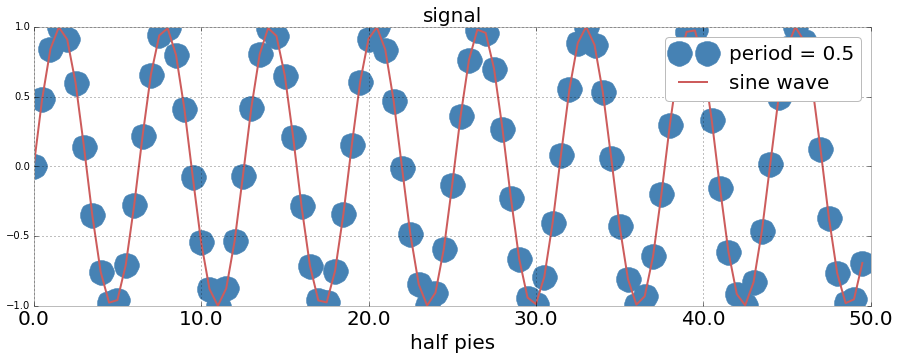

In [6]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
N = 100
period = 0.5
sampling_rate= 1.0/period
print ("PERIOD = ", period)
x = np.arange(0,N/2,period)
sinewave = np.sin(x)
ax.plot(x, sinewave, '.', ms=50, label= "period = %.1f"%period);
ax.plot(x, sinewave, '-', label = "sine wave");
ax.legend(fontsize = 20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
pl.xlabel("half pies", fontsize=20)
pl.title("signal", fontsize=20)

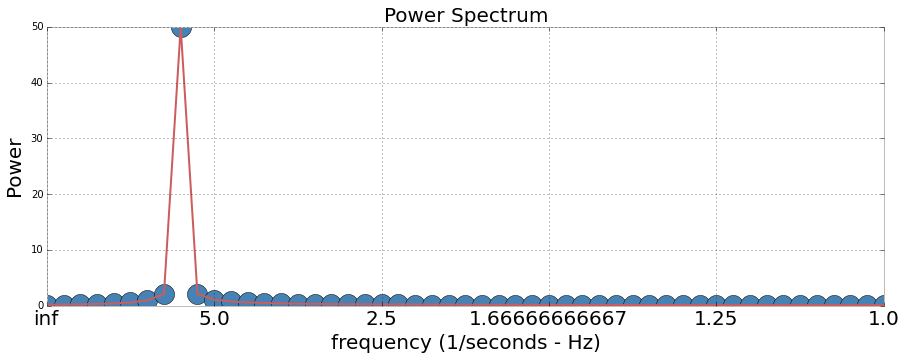

In [184]:
f = np.abs(np.fft.rfft(sinewave))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, period), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, period), (f), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/seconds - Hz)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Power Spectrum", fontsize=20)

USE numpy.fft.rfft to take the fourier transform of the REAL part of your data (always real for us) only 

[ 0.19978950 +0.j          0.20091343 +0.06839125j  0.20451261 +0.14355922j
  0.21139482 +0.23477528j  0.22347353 +0.35851397j  0.24548766 +0.5517485j
  0.29208911 +0.92526695j  0.43943655 +2.05020863j -6.45099756-49.53438679j
 -0.12135150 -2.11380265j]
[ 0.19978950 +0.j          0.20091343 +0.06839125j  0.20451261 +0.14355922j
  0.21139482 +0.23477528j  0.22347353 +0.35851397j  0.24548766 +0.5517485j
  0.29208911 +0.92526695j  0.43943655 +2.05020863j -6.45099756-49.53438679j
 -0.12135150 -2.11380265j]


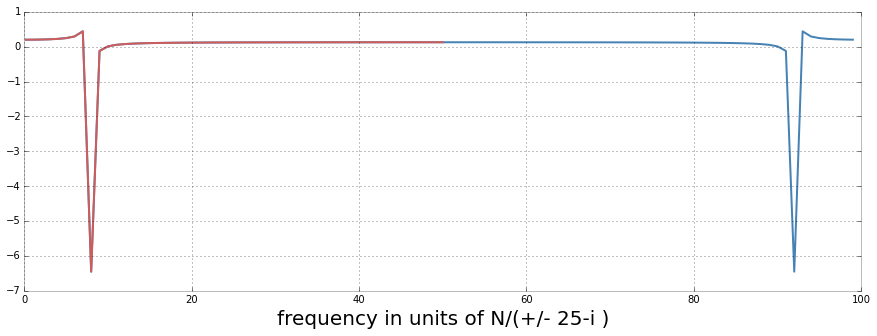

In [188]:
f = np.fft.fft(sinewave)
print (f[:10])
print (np.fft.rfft(sinewave)[:10])
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(f)
ax.plot(np.fft.rfft(sinewave))
pl.xlabel("frequency in units of N/(+/- 25-i )", fontsize=20)

take the absolute value of the FFT to suppress imaginary terms and get a positive POWER

[  0.1997895    0.2122347    0.24986928   0.31592278   0.42246028
   0.60389619   0.97027572   2.09677369  49.95268605   2.11728312]


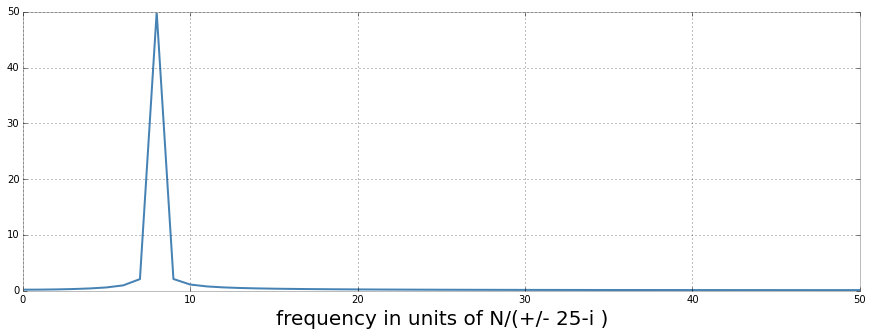

In [189]:
f = np.abs(np.fft.rfft(sinewave))
print (f[:10])
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(f)
pl.xlabel("frequency in units of N/(+/- 25-i )", fontsize=20)

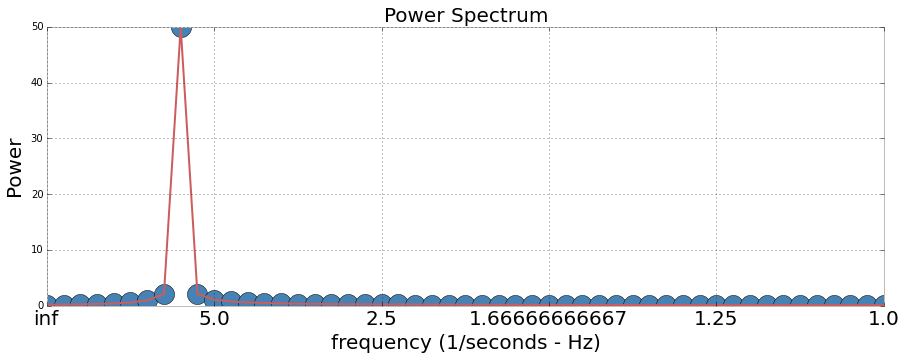

In [191]:
f = np.abs(np.fft.rfft(sinewave))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, period), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, period), (f), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/seconds - Hz)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Power Spectrum", fontsize=20)

In [107]:
import pandas as pd
trash = pd.read_csv("/Users/fbianco/Desktop/nyc_weekly_refuse.csv")
trash.head()
trash.describe()

,Tons_Collected
count,575.000000
mean,50872.458939
std,5508.928712
min,430.430000
25%,48683.060000
50%,50831.840000
75%,53808.265000
max,89816.600000


PERIOD =  1.0


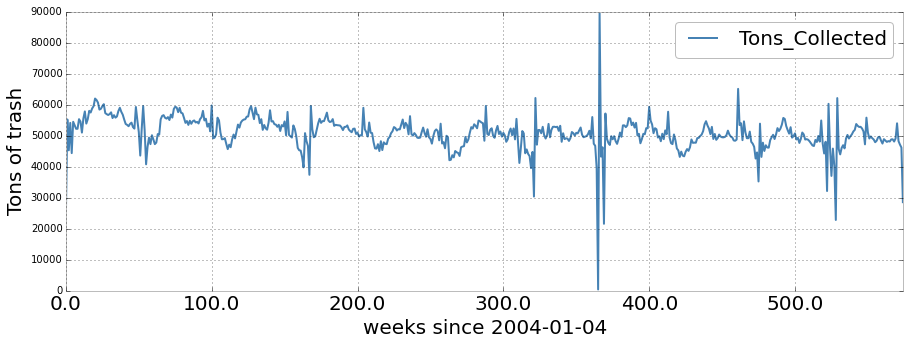

In [193]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
N = len(trash)
period = 1.
sampling_rate= np.pi/period
print ("PERIOD = ", period)
ax = trash.plot(x='Dump_Time_Stamp', y='Tons_Collected', ax=ax)
#ax.plot(trash.Dump_Time_Stamp, trash.Tons_Collected, '.', ms=50, label= "period = ?");
#ax.plot(trash.Dump_Time_Stamp, trash.Tons_Collected, '-', label = "trash pickup");
ax.legend(fontsize = 20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
pl.xlabel("weeks since 2004-01-04", fontsize=20)
pl.ylabel("Tons of trash", fontsize=20)


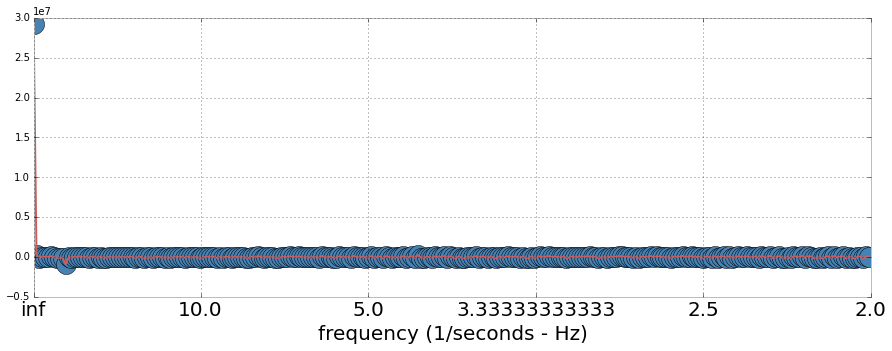

In [194]:
f = np.fft.rfft(trash.Tons_Collected)
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/seconds - Hz)", fontsize=20)

[  inf  575.]
[ 2.01754386  2.01048951]


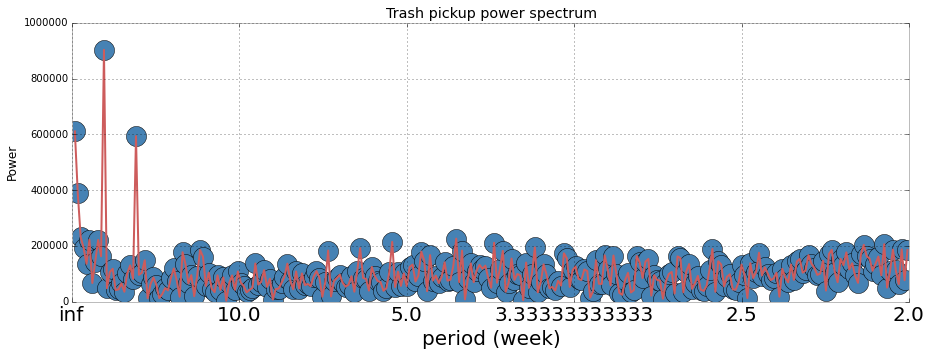

In [197]:
f = np.abs(np.fft.rfft(trash.Tons_Collected))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
print (1.0/np.fft.rfftfreq(N, 1.0)[0:2])
print (1.0/np.fft.rfftfreq(N, 1.0)[-3:-1])
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (week)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Trash pickup power spectrum", fontsize=20)

[  inf  575.]
[ 2.01754386  2.01048951]


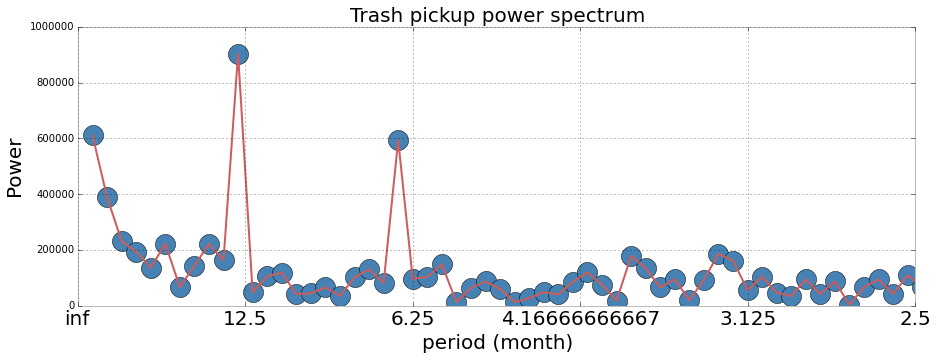

In [198]:
f = np.abs(np.fft.rfft(trash.Tons_Collected))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
print (1.0/np.fft.rfftfreq(N, 1.0)[0:2])
print (1.0/np.fft.rfftfreq(N, 1.0)[-3:-1])
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xlim(0,1.0/10)
ax.set_xticklabels([ "%s"%(1/4./f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (month)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Trash pickup power spectrum", fontsize=20)